Building a network to classify Reuters newswires into 46 mutually exclusive topics. Because you have so many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification. If each data point could belong to multiple categories(in this case, topics), you'd be facing a multilabel, multiclass classification problem.

# The Reuters Dataset

In [3]:
# Loading the Reuters Dataset
# Reuters dataset, a short newswires and their topics, published by Reuters in 1986. 
# Used for text classification
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000) # restricts the data to 10,000 
# most frequently occuring words found in the data

len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

train_labels[10]

557056/550378 [==============================] - 0s 1us/step


3

# Preparing the data

In [8]:
# Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [10]:
# to vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor
# or you can use one-hot encoding. One-hot encoding is widely used format for categorical data,
# also called categorical encoding.
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
# Note there is a built-in way to do this in Keras
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building your network

In [13]:
# Model Definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# You end the network with a Dense layer of size 46. This means that for each input sample, the network will output
# 46-dimensional vector. Each entry in this vector will encode a different output class

# The last layer uses softmax activation. It means the network will output a probability distribution over the 46
# different output classes - for every input sample, the network will produce a 46 dimension output vector, where
# output[i] is the probabilit that the sample belongs to class i. The 46 scores will sum to 1.

In [14]:
# Compiling the Model
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# Validating your Approach

In [19]:
# Setting aside a validation set
# Let's set apart 1,000 samples in the training data to use a validation set
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
# Training the Model
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20, 
                   batch_size=512,
                   validation_data = (X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 310us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3438 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.0929 - acc: 0.7657 - val_loss: 1.1702 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.8681 - acc: 0.8167 - val_loss: 1.0776 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.7020 - acc: 0.8477 - val_loss: 0.9841 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.5665 - acc: 0.8799 - val_loss: 0.9396 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.4596 - acc: 0.9029 - val_loss: 0.9084 - val_acc: 0.8020


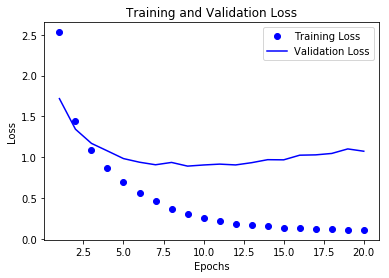

In [22]:
# Plotting the Training and Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

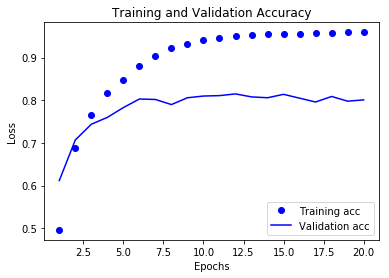

In [23]:
# Plotting the Training and Validation Accuracy
plt.clf # clears the figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_X_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(X_val, y_val))
results = model.evaluate(X_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 218us/step - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 183us/step - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 178us/step - loss: 1.0207 - acc: 0.7781 - val_loss: 1.1321 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 163us/step - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.6392 - acc: 0.8629 - val_loss: 0.9753 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 187us/step - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.4115 - acc: 0.9141 - val_loss: 0.8913 - val_acc: 0.8240
Epoch 8

In [26]:
results

[1.0225298075620766, 0.7773820125196835]

# Generating Predictions for New Data

In [27]:
# Generating predictions for new data
predictions = model.predict(X_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

1.0000002

In [30]:
np.argmax(predictions[0])

3